<a href="https://colab.research.google.com/github/matthewzelten/lab-5-matthewzelten/blob/main/Copy_of_DATA_301_Lab_5_Matthew_Zelten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of Hamilton, Jay, or Madison. The known authorships can be found in `https://dlsun.github.io/pods/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will use the papers with known authorship to predict the authorships of the disputed papers. The text of each paper is available at `https://dlsun.github.io/pods/data/federalist/x.txt`, where `x` is the number of the paper (i.e., a number from 1 to 85). The name of the file indicates the number of the paper.

## Question 1

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" even once.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words across the corpus. (Because we are restricting to the most common words already, there is no reason to reweight them using TF-IDF.)

In [ ]:
import pandas as pd
import requests
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/federalist/"

In [ ]:
df_fed = pd.read_csv(data_dir + "authorship.csv")
df_fed

,Paper,Author
0,1,Hamilton
1,2,Jay
2,3,Jay
3,4,Jay
4,5,Jay
...,...,...
80,81,Hamilton
81,82,Hamilton
82,83,Hamilton
83,84,Hamilton


In [ ]:
test = requests.get(data_dir + "1.txt", 'r')
test.text

'To the People of the State of New York:\n\nAFTER an unequivocal experience of the inefficacy of the subsisting\nfederal government, you are called upon to deliberate on a new\nConstitution for the United States of America. The subject speaks its\nown importance; comprehending in its consequences nothing less than the\nexistence of the UNION, the safety and welfare of the parts of which it\nis composed, the fate of an empire in many respects the most interesting\nin the world. It has been frequently remarked that it seems to have been\nreserved to the people of this country, by their conduct and example,\nto decide the important question, whether societies of men are really\ncapable or not of establishing good government from reflection and\nchoice, or whether they are forever destined to depend for their\npolitical constitutions on accident and force. If there be any truth\nin the remark, the crisis at which we are arrived may with propriety be\nregarded as the era in which that decis

In [ ]:
papers = pd.Series()
temp = []
for i in range(1, 86):
  num = str(i)
  val = requests.get(data_dir + num + ".txt", 'r').text
  papers[num] = val
  temp.append(val)

papers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


1     To the People of the State of New York:\n\nAFT...
2     To the People of the State of New York:\n\nWHE...
3     To the People of the State of New York:\n\nIT ...
4     To the People of the State of New York:\n\nMY ...
5     To the People of the State of New York:\n\nQUE...
                            ...                        
81    To the People of the State of New York:\n\nLET...
82    To the People of the State of New York:\n\nTHE...
83    To the People of the State of New York:\n\nTHE...
84    To the People of the State of New York:\n\nIN ...
85    To the People of the State of New York:\n\nACC...
Length: 85, dtype: object

In [ ]:
test = pd.Series(temp)

In [ ]:
df_fed['papers'] = (test.
    str.lower().
    str.replace("[^\w\s]", " ").
    str.split())
df_fed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Paper,Author,papers
0,1,Hamilton,"[to, the, people, of, the, state, of, new, yor..."
1,2,Jay,"[to, the, people, of, the, state, of, new, yor..."
2,3,Jay,"[to, the, people, of, the, state, of, new, yor..."
3,4,Jay,"[to, the, people, of, the, state, of, new, yor..."
4,5,Jay,"[to, the, people, of, the, state, of, new, yor..."
...,...,...,...
80,81,Hamilton,"[to, the, people, of, the, state, of, new, yor..."
81,82,Hamilton,"[to, the, people, of, the, state, of, new, yor..."
82,83,Hamilton,"[to, the, people, of, the, state, of, new, yor..."
83,84,Hamilton,"[to, the, people, of, the, state, of, new, yor..."


In [ ]:
words = (
    papers.
    str.lower().
    str.replace("[^\w\s]", " ").
    str.split()
)

words


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


1     [to, the, people, of, the, state, of, new, yor...
2     [to, the, people, of, the, state, of, new, yor...
3     [to, the, people, of, the, state, of, new, yor...
4     [to, the, people, of, the, state, of, new, yor...
5     [to, the, people, of, the, state, of, new, yor...
                            ...                        
81    [to, the, people, of, the, state, of, new, yor...
82    [to, the, people, of, the, state, of, new, yor...
83    [to, the, people, of, the, state, of, new, yor...
84    [to, the, people, of, the, state, of, new, yor...
85    [to, the, people, of, the, state, of, new, yor...
Length: 85, dtype: object

In [ ]:
words_bag = words.apply(Counter)

In [ ]:
tf = pd.DataFrame(list(words_bag))
tf = tf.fillna(0)

In [ ]:
words_bag

1     {'to': 72, 'the': 133, 'people': 6, 'of': 106,...
2     {'to': 53, 'the': 107, 'people': 23, 'of': 83,...
3     {'to': 56, 'the': 93, 'people': 8, 'of': 62, '...
4     {'to': 51, 'the': 86, 'people': 8, 'of': 72, '...
5     {'to': 45, 'the': 66, 'people': 3, 'of': 53, '...
                            ...                        
81    {'to': 163, 'the': 389, 'people': 1, 'of': 248...
82    {'to': 83, 'the': 168, 'people': 1, 'of': 94, ...
83    {'to': 219, 'the': 485, 'people': 3, 'of': 331...
84    {'to': 140, 'the': 390, 'people': 11, 'of': 29...
85    {'to': 115, 'the': 246, 'people': 7, 'of': 172...
Length: 85, dtype: object

In [ ]:
vec = CountVectorizer()
vec.fit(papers) # This determines the vocabulary. ;; learns what words are present
tf_sparse = vec.transform(papers)

tf_sparse.todense()

matrix([[0, 0, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 1, 0, 2]])

In [ ]:
c = Counter()
for counter in words_bag:
  c += counter
fifty = c.most_common(50)
fifty

[('the', 17767),
 ('of', 11824),
 ('to', 7074),
 ('and', 5099),
 ('in', 4456),
 ('a', 3991),
 ('be', 3825),
 ('that', 2792),
 ('it', 2550),
 ('is', 2194),
 ('which', 2068),
 ('by', 1741),
 ('as', 1721),
 ('this', 1410),
 ('would', 1273),
 ('have', 1262),
 ('will', 1255),
 ('for', 1237),
 ('or', 1233),
 ('not', 1215),
 ('their', 1098),
 ('with', 1053),
 ('from', 1043),
 ('are', 1032),
 ('on', 952),
 ('they', 928),
 ('an', 927),
 ('states', 851),
 ('government', 829),
 ('may', 816),
 ('been', 798),
 ('state', 787),
 ('all', 731),
 ('but', 697),
 ('its', 651),
 ('other', 646),
 ('people', 612),
 ('has', 603),
 ('power', 603),
 ('more', 579),
 ('at', 568),
 ('if', 563),
 ('than', 550),
 ('them', 548),
 ('one', 547),
 ('any', 545),
 ('no', 506),
 ('those', 481),
 ('can', 465),
 ('constitution', 463)]

In [ ]:
common_words = []
for i in range(len(fifty)):
  common_words.append(fifty[i][0])
common_words

['the',
 'of',
 'to',
 'and',
 'in',
 'a',
 'be',
 'that',
 'it',
 'is',
 'which',
 'by',
 'as',
 'this',
 'would',
 'have',
 'will',
 'for',
 'or',
 'not',
 'their',
 'with',
 'from',
 'are',
 'on',
 'they',
 'an',
 'states',
 'government',
 'may',
 'been',
 'state',
 'all',
 'but',
 'its',
 'other',
 'people',
 'has',
 'power',
 'more',
 'at',
 'if',
 'than',
 'them',
 'one',
 'any',
 'no',
 'those',
 'can',
 'constitution']

In [ ]:
words_bag.to_list

<bound method IndexOpsMixin.tolist of 1     {'to': 72, 'the': 133, 'people': 6, 'of': 106,...
2     {'to': 53, 'the': 107, 'people': 23, 'of': 83,...
3     {'to': 56, 'the': 93, 'people': 8, 'of': 62, '...
4     {'to': 51, 'the': 86, 'people': 8, 'of': 72, '...
5     {'to': 45, 'the': 66, 'people': 3, 'of': 53, '...
                            ...                        
81    {'to': 163, 'the': 389, 'people': 1, 'of': 248...
82    {'to': 83, 'the': 168, 'people': 1, 'of': 94, ...
83    {'to': 219, 'the': 485, 'people': 3, 'of': 331...
84    {'to': 140, 'the': 390, 'people': 11, 'of': 29...
85    {'to': 115, 'the': 246, 'people': 7, 'of': 172...
Length: 85, dtype: object>

In [ ]:

addition = [[]]
for i in range(len(df_fed)):
  for word in common_words:
    addition[i].append(words_bag[i].get(word))
  addition.append([])
addition = addition[:-1]
df_fed["vals"] = addition
df_fed

,Paper,Author,papers,vals
0,1,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[133, 106, 72, 40, 27, 25, 34, 28, 20, 13, 18,..."
1,2,Jay,"[to, the, people, of, the, state, of, new, yor...","[107, 83, 53, 83, 34, 30, 15, 44, 38, 16, 11, ..."
2,3,Jay,"[to, the, people, of, the, state, of, new, yor...","[93, 62, 56, 60, 25, 13, 31, 20, 21, 7, 11, 18..."
3,4,Jay,"[to, the, people, of, the, state, of, new, yor...","[86, 72, 51, 90, 24, 16, 26, 17, 28, 10, 10, 1..."
4,5,Jay,"[to, the, people, of, the, state, of, new, yor...","[66, 53, 45, 72, 28, 9, 31, 23, 21, 7, 10, 10,..."
...,...,...,...,...
80,81,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[389, 248, 163, 88, 135, 87, 85, 49, 65, 61, 4..."
81,82,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[168, 94, 83, 41, 38, 22, 36, 19, 13, 15, 18, ..."
82,83,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[485, 331, 219, 121, 213, 139, 105, 121, 102, ..."
83,84,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[390, 293, 140, 89, 91, 72, 94, 84, 64, 68, 53..."


## Question 2
Make a visualization that summarizes the most common words used by Hamilton, Madison, and Jay.

In [ ]:
df_vals = pd.DataFrame()
df_vals["Author"] = df_fed["Author"]

for i in range(50):
  df_vals[common_words[i]] = pd.Series([paper[i] for paper in df_fed["vals"]])
df_vals

,Author,the,of,to,and,in,a,be,that,it,is,which,by,as,this,would,have,will,for,or,not,their,with,from,are,on,they,an,states,government,may,been,state,all,but,its,other,people,has,power,more,at,if,than,them,one,any,no,those,can,constitution
0,Hamilton,133,106,72,40,27,25,34,28,20,13,18,14,10,14,2,10,25,12,6,14,14,6,11,12,9.0,6,11,2.0,9,11.0,3.0,6,9,2,10.0,3,6,6.0,2.0,7.0,8,4.0,11.0,2.0,4,6.0,3.0,9.0,3.0,8.0
1,Jay,107,83,53,83,34,30,15,44,38,16,11,10,16,14,5,17,2,13,10,10,21,13,4,6,8.0,22,1,2.0,9,4.0,8.0,1,4,8,5.0,4,23,6.0,1.0,5.0,10,3.0,5.0,4.0,10,1.0,1.0,2.0,NaN,NaN
2,Jay,93,62,56,60,25,13,31,20,21,7,11,18,24,6,2,7,24,11,32,13,11,10,15,8,6.0,5,3,11.0,16,6.0,2.0,8,4,7,1.0,7,8,5.0,3.0,13.0,1,7.0,8.0,8.0,8,5.0,2.0,6.0,3.0,NaN
3,Jay,86,72,51,90,24,16,26,17,28,10,10,14,20,1,17,9,15,12,24,14,19,12,8,11,11.0,17,3,1.0,16,10.0,2.0,6,4,10,9.0,11,8,1.0,2.0,13.0,2,14.0,9.0,12.0,13,5.0,1.0,4.0,8.0,NaN
4,Jay,66,53,45,72,28,9,31,23,21,7,10,10,3,6,37,1,7,7,10,8,11,11,11,3,5.0,11,4,1.0,2,2.0,NaN,2,4,4,4.0,4,3,NaN,1.0,11.0,4,3.0,9.0,11.0,10,3.0,2.0,9.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Hamilton,389,248,163,88,135,87,85,49,65,61,41,32,46,44,21,23,30,21,21,26,11,14,20,15,16.0,11,22,18.0,7,25.0,22.0,26,13,20,10.0,6,1,12.0,20.0,4.0,7,6.0,6.0,16.0,10,15.0,8.0,12.0,6.0,13.0
81,Hamilton,168,94,83,41,38,22,36,19,13,15,18,4,15,14,11,7,7,4,13,13,6,6,14,11,NaN,10,10,8.0,3,14.0,1.0,18,7,4,4.0,2,1,NaN,10.0,1.0,2,2.0,3.0,4.0,9,1.0,4.0,6.0,5.0,4.0
82,Hamilton,485,331,219,121,213,139,105,121,102,116,79,82,54,60,48,54,24,39,26,36,16,30,22,43,18.0,29,20,23.0,16,16.0,36.0,33,28,25,21.0,21,3,22.0,10.0,23.0,19,24.0,16.0,21.0,18,16.0,22.0,13.0,6.0,13.0
83,Hamilton,390,293,140,89,91,72,94,84,64,68,53,31,35,36,18,27,38,27,21,30,29,14,20,33,21.0,22,15,19.0,25,26.0,18.0,27,14,18,7.0,10,11,19.0,13.0,7.0,10,8.0,16.0,5.0,5,32.0,27.0,9.0,11.0,28.0


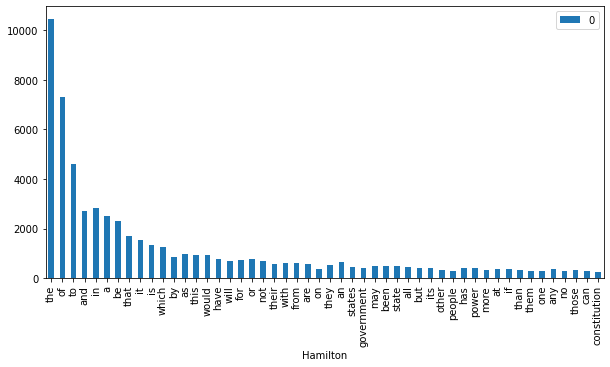

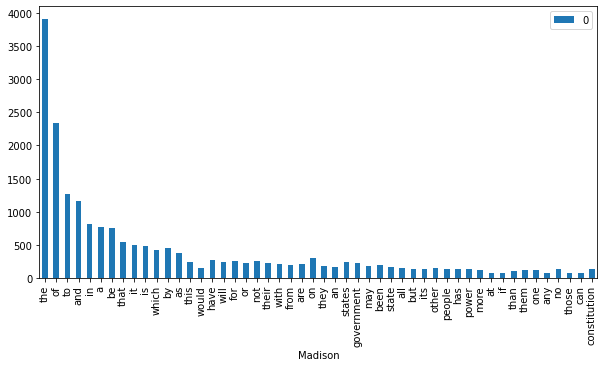

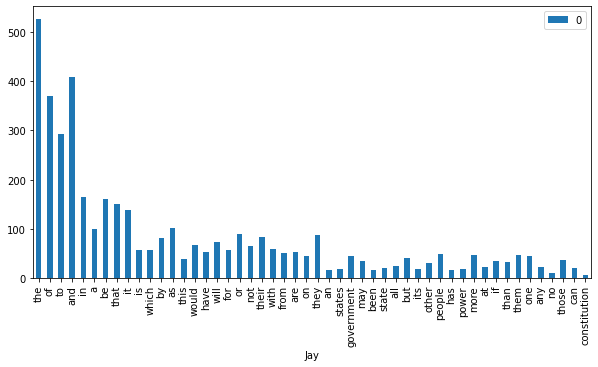

In [ ]:
ham = df_vals[df_vals["Author"] == "Hamilton"].sum(axis = 0)
mad = df_vals[df_vals["Author"] == "Madison"].sum(axis = 0)
jay = df_vals[df_vals["Author"] == "Jay"].sum(axis = 0)


pd.DataFrame(ham).iloc[1:].plot.bar(figsize = (10,5), xlabel="Hamilton")
pd.DataFrame(mad).iloc[1:].plot.bar(figsize = (10,5), xlabel="Madison")
pd.DataFrame(jay).iloc[1:].plot.bar(figsize = (10,5), xlabel="Jay")

## Question 3

For each of the documents with disputed authorships, find the 5 most similar documents with _known_ authorships, using cosine distance on the term frequencies. Use the authors of these 5 most similar documents to predict the author of each disputed document. (For example, if 3 of the 5 closest documents were written by Hamilton, 1 by Madison, and 1 by Jay, then we would predict that the disputed document was written by Hamilton.)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.feature_extraction.text import TfidfVectorizer

df_fed["Author"].fillna("unknown", inplace=True)
df_known = df_fed[df_fed["Author"] != "unknown"]
df_unknown = df_fed[df_fed["Author"] == "unknown"]

df_unknown


,Paper,Author,papers,vals
17,18,unknown,"[to, the, people, of, the, state, of, new, yor...","[240, 135, 54, 79, 41, 37, 6, 21, 26, 10, 12, ..."
18,19,unknown,"[to, the, people, of, the, state, of, new, yor...","[208, 125, 59, 82, 41, 27, 14, 13, 19, 16, 31,..."
19,20,unknown,"[to, the, people, of, the, state, of, new, yor...","[137, 81, 42, 54, 39, 28, 7, 9, 12, 15, 13, 19..."
48,49,unknown,"[to, the, people, of, the, state, of, new, yor...","[178, 101, 58, 42, 34, 33, 47, 21, 26, 18, 20,..."
49,50,unknown,"[to, the, people, of, the, state, of, new, yor...","[101, 60, 28, 33, 28, 14, 31, 12, 16, 6, 9, 11..."
50,51,unknown,"[to, the, people, of, the, state, of, new, yor...","[202, 113, 50, 40, 50, 46, 63, 25, 32, 20, 14,..."
51,52,unknown,"[to, the, people, of, the, state, of, new, yor...","[186, 101, 72, 37, 33, 35, 46, 30, 32, 19, 21,..."
52,53,unknown,"[to, the, people, of, the, state, of, new, yor...","[194, 128, 73, 62, 45, 48, 51, 24, 18, 28, 23,..."
53,54,unknown,"[to, the, people, of, the, state, of, new, yor...","[204, 117, 61, 38, 65, 35, 40, 28, 27, 35, 25,..."
54,55,unknown,"[to, the, people, of, the, state, of, new, yor...","[182, 122, 78, 48, 30, 48, 52, 32, 17, 25, 29,..."


In [ ]:
paper_nums = df_unknown["Paper"].to_list()
paper_nums

[18, 19, 20, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63]

In [ ]:
madison = []
hamilton = []
jay = []

vec = TfidfVectorizer(norm=None) # Do not normalize.! 
vec.fit(papers) # This determines the vocabulary.
tf_idf_sparse = vec.transform(papers)
tf_idf_sparse



<85x8616 sparse matrix of type '<class 'numpy.float64'>'
	with 59720 stored elements in Compressed Sparse Row format>

In [ ]:
sims = cosine_similarity(tf_idf_sparse)
sims


array([[1.        , 0.79063409, 0.78004685, ..., 0.82414394, 0.87790244,
        0.88092628],
       [0.79063409, 1.        , 0.78118623, ..., 0.77986509, 0.81519284,
        0.8154928 ],
       [0.78004685, 0.78118623, 1.        , ..., 0.77028501, 0.79590875,
        0.79499612],
       ...,
       [0.82414394, 0.77986509, 0.77028501, ..., 1.        , 0.88315625,
        0.87073392],
       [0.87790244, 0.81519284, 0.79590875, ..., 0.88315625, 1.        ,
        0.91554485],
       [0.88092628, 0.8154928 , 0.79499612, ..., 0.87073392, 0.91554485,
        1.        ]])

In [ ]:
res = []

for num in paper_nums:
  val = sims[num].max()
  sims[num][list(sims[num]).index(val)] = 0
  val = sims[num].max()
  res.append(list(sims[num]).index(val))
res

[44, 40, 35, 48, 42, 42, 35, 42, 56, 35, 83, 62, 59, 42, 36]

In [ ]:
temp = pd.DataFrame()
temp = df_fed.iloc[res] #this df represents the most similar to teh input
temp

,Paper,Author,papers,vals
44,45,Madison,"[to, the, people, of, the, state, of, new, yor...","[278, 143, 66, 63, 40, 20, 52, 30, 19, 23, 17,..."
40,41,Madison,"[to, the, people, of, the, state, of, new, yor...","[336, 204, 119, 88, 63, 81, 74, 42, 52, 38, 36..."
35,36,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[267, 193, 130, 77, 69, 45, 82, 44, 39, 35, 31..."
48,49,unknown,"[to, the, people, of, the, state, of, new, yor...","[178, 101, 58, 42, 34, 33, 47, 21, 26, 18, 20,..."
42,43,Madison,"[to, the, people, of, the, state, of, new, yor...","[356, 223, 112, 79, 55, 93, 78, 50, 57, 34, 34..."
42,43,Madison,"[to, the, people, of, the, state, of, new, yor...","[356, 223, 112, 79, 55, 93, 78, 50, 57, 34, 34..."
35,36,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[267, 193, 130, 77, 69, 45, 82, 44, 39, 35, 31..."
42,43,Madison,"[to, the, people, of, the, state, of, new, yor...","[356, 223, 112, 79, 55, 93, 78, 50, 57, 34, 34..."
56,57,unknown,"[to, the, people, of, the, state, of, new, yor...","[216, 151, 74, 54, 40, 37, 43, 31, 26, 34, 30,..."
35,36,Hamilton,"[to, the, people, of, the, state, of, new, yor...","[267, 193, 130, 77, 69, 45, 82, 44, 39, 35, 31..."


In [ ]:
predicts = temp["Author"]
predicts.to_list()
df_unknown["predictions"] = predicts.to_list()
df_unknown

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Paper,Author,papers,vals,predictions
17,18,unknown,"[to, the, people, of, the, state, of, new, yor...","[240, 135, 54, 79, 41, 37, 6, 21, 26, 10, 12, ...",Madison
18,19,unknown,"[to, the, people, of, the, state, of, new, yor...","[208, 125, 59, 82, 41, 27, 14, 13, 19, 16, 31,...",Madison
19,20,unknown,"[to, the, people, of, the, state, of, new, yor...","[137, 81, 42, 54, 39, 28, 7, 9, 12, 15, 13, 19...",Hamilton
48,49,unknown,"[to, the, people, of, the, state, of, new, yor...","[178, 101, 58, 42, 34, 33, 47, 21, 26, 18, 20,...",unknown
49,50,unknown,"[to, the, people, of, the, state, of, new, yor...","[101, 60, 28, 33, 28, 14, 31, 12, 16, 6, 9, 11...",Madison
50,51,unknown,"[to, the, people, of, the, state, of, new, yor...","[202, 113, 50, 40, 50, 46, 63, 25, 32, 20, 14,...",Madison
51,52,unknown,"[to, the, people, of, the, state, of, new, yor...","[186, 101, 72, 37, 33, 35, 46, 30, 32, 19, 21,...",Hamilton
52,53,unknown,"[to, the, people, of, the, state, of, new, yor...","[194, 128, 73, 62, 45, 48, 51, 24, 18, 28, 23,...",Madison
53,54,unknown,"[to, the, people, of, the, state, of, new, yor...","[204, 117, 61, 38, 65, 35, 40, 28, 27, 35, 25,...",unknown
54,55,unknown,"[to, the, people, of, the, state, of, new, yor...","[182, 122, 78, 48, 30, 48, 52, 32, 17, 25, 29,...",Hamilton


## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 5 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.